<a href="https://colab.research.google.com/github/pratikjori20/Netflix-movies-TV-Shows-Clustring-ML-unsupervised/blob/main/individual_notebook_capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<B>Netflix Movies and TV Shows Clustering

# Problem statement

# Variable description

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount the  drive on colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the path of csv file

path = '/content/drive/MyDrive/ML Unsupervised /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

df = pd.read_csv(path)

In [4]:
# first look of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# no of rows and columns in dataset

df.shape

(7787, 12)

In [6]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# checking duplicate values
df_duplicated = df[df.duplicated()]
print("Let's see which columns contains dupilcate rows")
df_duplicated

Let's see which columns contains dupilcate rows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*   There is no duplicated values present in the dataset.



In [13]:
# missing/ Null values count

null = pd.DataFrame({'No of Total values': df.shape[0] , 'No of NaN Values': df.isnull().sum(),
                     '% of NaN values': round((df.isnull().sum()/df.shape[0])*100, 2)})
null.sort_values('No of NaN Values', ascending = False)

,No of Total values,No of NaN Values,% of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00




*   director column has highest 30.68% NaN values
*   cast ccolumn has 9.22% NaN values
*   country, date_added, rating columns also containing NaN values




In [29]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
# ploting null values present in dataset

nan = df.isna()
nan.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

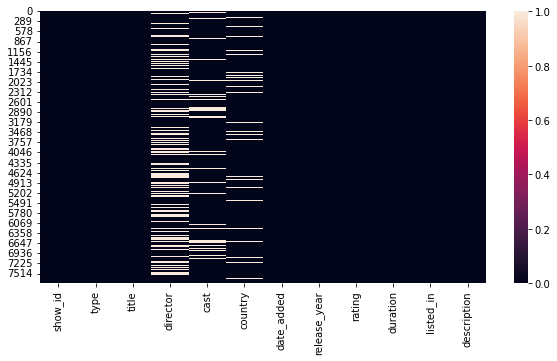

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(nan)

In [16]:
# columns in dataset

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# describe the dataset

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


*  as we see in the dataframe that only 'release_year' column contains the numeric data so it showing only that columns describtion.

In [28]:
df.describe(include= 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [21]:
# checking the unique values for the all varaibles

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

* there is only 2 unique values in 'type' columns let's check it.

In [23]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

# Data Wrangling

In [31]:
# handling thae missing values
df['director'].fillna('unknown', inplace =True)
df['cast'].fillna('unknown', inplace =True)
df['country'].fillna('unknown', inplace =True)
df['date_added'].fillna('unknown', inplace =True)
df['rating'].fillna('unknown', inplace =True)

In [32]:
# creating dataset copy
df_copy = df.copy()

In [33]:
df_copy ['listed_in'] = df_copy.listed_in.apply(lambda row: row.split(', '))
df_copy.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

# Exploratory Data Analysis

<Figure size 1080x648 with 0 Axes>

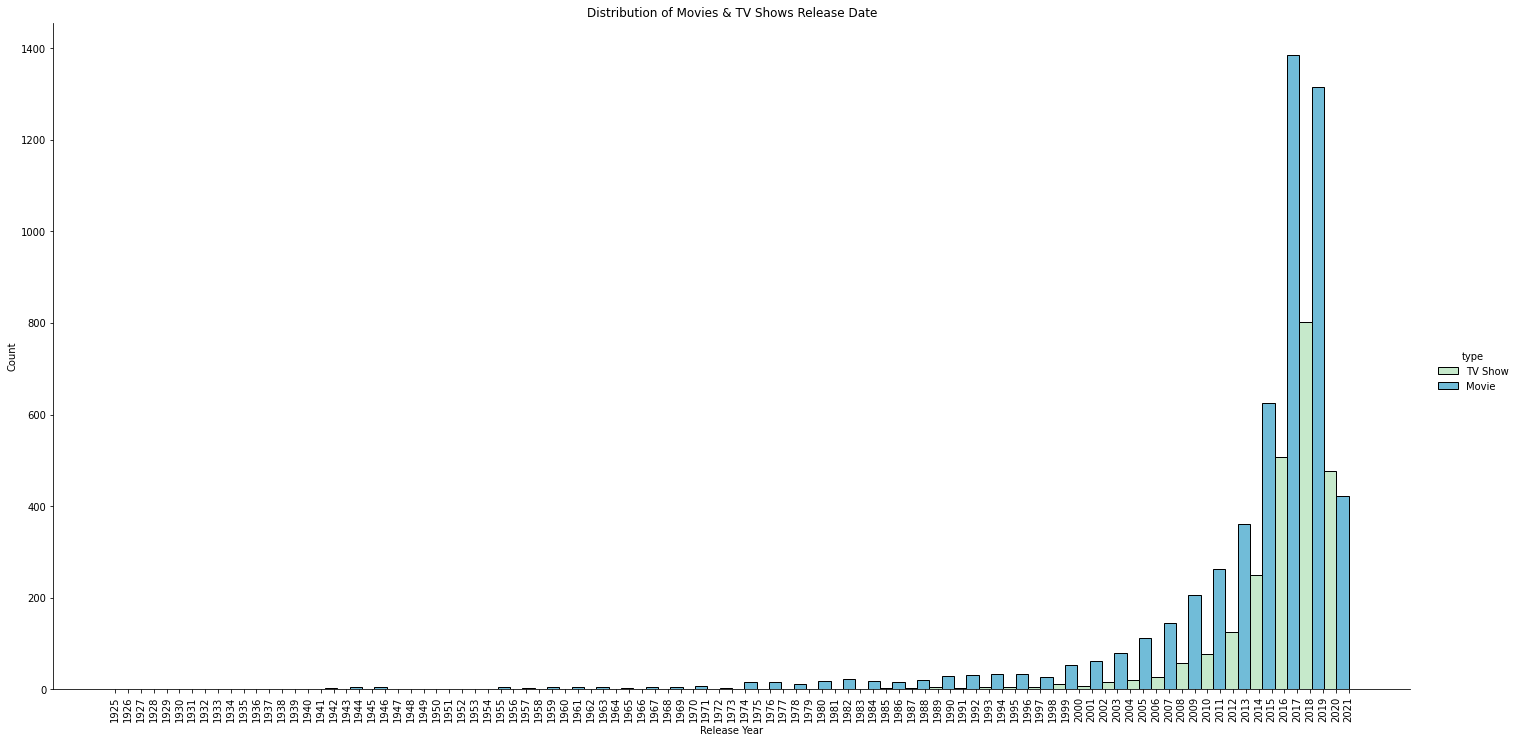

In [38]:
# histogram for release dates of movies and tv shows
ticks=np.arange(df.release_year.min(), df.release_year.max()+1,1)
plt.figure(figsize=(15,9))
sns.displot(x='release_year', data= df, kind='hist', height=10, aspect=2, bins=50, hue='type', multiple='dodge', palette='GnBu')
plt.xticks(ticks, rotation=90)
plt.xlabel('Release Year')
plt.title('Distribution of Movies & TV Shows Release Date')
plt.show();

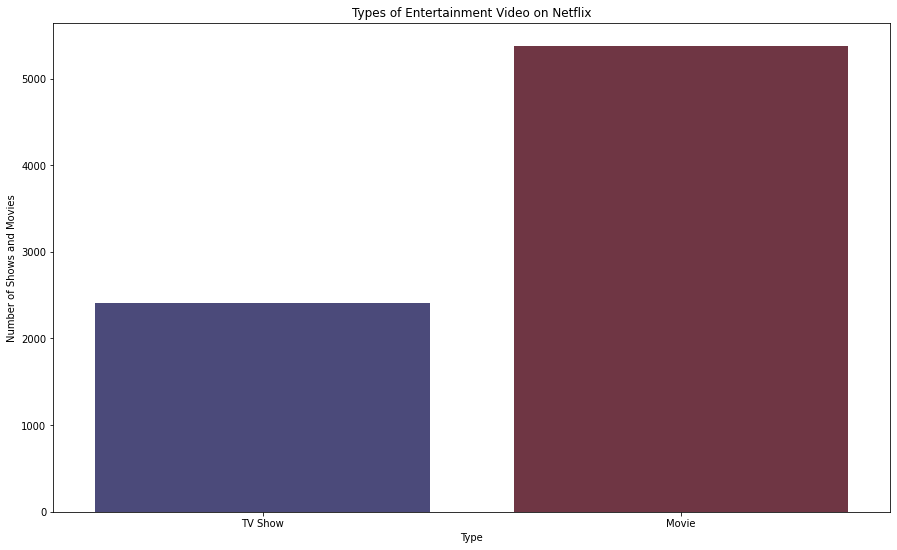

In [40]:
# Types of video present on Netflix

plt.figure(figsize=(15,9))
sns.countplot(x=df['type'], data=df, palette='icefire')
plt.xlabel('Type')
plt.ylabel('Number of Shows and Movies')
plt.title('Types of Entertainment Video on Netflix')
plt.show();



*   There is only half TV shows present than the Movies on Netflix

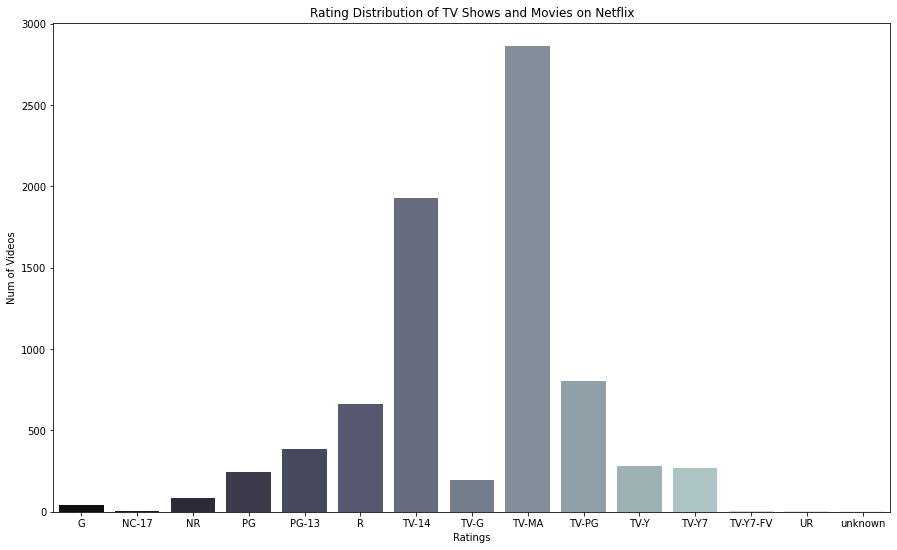

In [42]:
# rating on the netflix

plt.figure(figsize=(15,9))
a = df.groupby('rating').agg({'show_id':'count'}).reset_index()
sns.barplot(x=a['rating'], y=a['show_id'], palette='bone')
plt.xlabel('Ratings')
plt.ylabel('Num of Videos')
plt.title('Rating Distribution of TV Shows and Movies on Netflix')
plt.show();

* Most of the content on Netflix is rated for above 14 year old audiance.